In [ ]:
# Justin Code Block Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import pandas as pd

file_path = "/merged_data.csv"
df = pd.read_csv(file_path)

df['visit_id'] = df['visit_id'].astype(str).str.replace('_', '.', regex=False)

df['upd23b_clinical_state_on_medication'] = df['upd23b_clinical_state_on_medication'].replace({
    'On': 1,
    'Off': 0,
    '0': np.nan
})

target_columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
X = df.drop(columns=target_columns + ["visit_id", "patient_id"], errors='ignore')
y = df[target_columns]

if X.isnull().values.any() or y.isnull().values.any():
    print("Warning: Dataset contains missing values.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred, multioutput="raw_values")
mse = mean_squared_error(y_test, y_pred, multioutput="raw_values")
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred, multioutput="raw_values")

print(mae)
print(mse)
print(rmse)
print(r2)
print(np.mean(mae))
print(np.mean(mse))
print(np.mean(rmse))
print(np.mean(r2))




<ipython-input-6-7d77c6cad1ce>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['upd23b_clinical_state_on_medication'] = df['upd23b_clinical_state_on_medication'].replace({


[3.73631168 4.19554907 9.7905552  1.10235515]
[ 24.2585463   30.32944542 155.9053412    3.68272127]
[ 4.92529657  5.50721757 12.48620604  1.91904176]
[0.0888321  0.15323954 0.1990406  0.10890205]
4.7061927750060795
53.54401354664075
6.209440484803664
0.1375035698130822


In [ ]:
#Dilraj Code Block
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/merged_data (1).csv"
df = pd.read_csv(file_path)
# Turn the categorical variables to numerical
df["upd23b_clinical_state_on_medication"] = LabelEncoder().fit_transform(
    df["upd23b_clinical_state_on_medication"])
# Identify which columnns are features and which are
X = df.drop(columns=["visit_id", "patient_id", "updrs_1", "updrs_2", "updrs_3", "updrs_4"])
y = df[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Define the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Testing K values 1 through 20
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")
# Train the optimized KNN Regressor
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
# Make predictions
y_pred = knn.predict(X_test)
# Function to calculate SMAPE (%)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
smape_score = smape(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"SMAPE (%): {smape_score:.4f}")



Best k: 20
MAE: 4.732760847107438
MSE: 52.78826510847104
RMSE: 7.265553324315433
R² Score: 0.13034528382740965
SMAPE (%): 89.0646


In [ ]:
#Liveesh Codeblock

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib  #models for later use

# STEP 1: LOAD & PREPROCESS DATA

# Load the dataset
file_path = "/content/merged_data.csv"
df = pd.read_csv(file_path)
# Convert categorical column to numeric (label encoding)
df["upd23b_clinical_state_on_medication"] = LabelEncoder().fit_transform(df["upd23b_clinical_state_on_medication"])
# STEP 2: BIN THE UPDRS SCORES

# Define the bin edges (thresholds) and labels
bins = [0, 10, 20, 30, 40, np.inf]  # Adjust if needed based on actual UPDRS score distribution
labels = [0, 1, 2, 3, 4]  # Corresponding categories (Mild to Severe)

# Apply binning to each UPDRS column
for col in ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]:
    df[f"{col}_bin"] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[f"{col}_bin"] = df[f"{col}_bin"].astype(int)  # Convert categories to int for classification


# STEP 3: PREPARE DATA FOR TRAINING

# Define feature set (X) - drop UPDRS columns and identifiers
X = df.drop(columns=["visit_id", "patient_id", "updrs_1", "updrs_2", "updrs_3", "updrs_4",
                      "updrs_1_bin", "updrs_2_bin", "updrs_3_bin", "updrs_4_bin"])

# Standardize features (since different scales can affect model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  #Transform features

# Define target variables (each UPDRS score bin will be a separate classification problem)
y = df[["updrs_1_bin", "updrs_2_bin", "updrs_3_bin", "updrs_4_bin"]]

# STEP 4: TRAIN CLASSIFICATION MODELS

# Dictionary to store trained models
classifiers = {}

# Train a Random Forest Classifier for each UPDRS bin
for col in y.columns:
    print(f"\nTraining classifier for: {col}")

  # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y[col], test_size=0.2, random_state=42)
    # Initialize and train the model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees for now
    clf.fit(X_train, y_train)
    # Store model for later use
    classifiers[col] = clf
    # Make predictions
    y_pred = clf.predict(X_test)
    # Evaluate performance
    print(f"Classification Report for {col}:")
    print(classification_report(y_test, y_pred))


# STEP 5: SAVE MODELS & RESULTS


# Save each trained model
for col, model in classifiers.items():
    joblib.dump(model, f"/content/{col}_classifier.pkl")  #these are the models as files

print("\n All models trained and saved.")



Training classifier for: updrs_1_bin
Classification Report for updrs_1_bin:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       793
           1       0.34      0.10      0.16       159
           2       0.00      0.00      0.00        16

    accuracy                           0.81       968
   macro avg       0.39      0.36      0.35       968
weighted avg       0.74      0.81      0.76       968


Training classifier for: updrs_2_bin


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for updrs_2_bin:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       740
           1       0.24      0.05      0.08       201
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         1

    accuracy                           0.75       968
   macro avg       0.25      0.25      0.24       968
weighted avg       0.64      0.75      0.67       968


Training classifier for: updrs_3_bin


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for updrs_3_bin:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       231
           1       0.35      0.68      0.46       262
           2       0.26      0.15      0.19       239
           3       0.17      0.06      0.08       158
           4       0.27      0.17      0.20        78

    accuracy                           0.37       968
   macro avg       0.32      0.32      0.30       968
weighted avg       0.35      0.37      0.34       968


Training classifier for: updrs_4_bin
Classification Report for updrs_4_bin:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       963
           1       0.00      0.00      0.00         5

    accuracy                           0.99       968
   macro avg       0.50      0.50      0.50       968
weighted avg       0.99      0.99      0.99       968



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



 All models trained and saved.


In [ ]:
#Utkarsh's Code Block
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
!pip install tabulate  # Install tabulate if not already available in Colab
from tabulate import tabulate

# STEP 1: LOAD DATA
# Load the merged dataset (assumes you uploaded merged_data.csv to Colab)
file_path = "/content/merged_data.csv"  # Adjust if filename differs after upload
merged_df = pd.read_csv(file_path)

# STEP 2: PREPROCESS DATA
# Convert categorical column to numeric
merged_df['upd23b_clinical_state_on_medication'] = LabelEncoder().fit_transform(merged_df['upd23b_clinical_state_on_medication'])

# Ensure all columns are numeric
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, NaN for non-convertible
merged_df.fillna(0, inplace=True)  # Fill NaN with 0

# STEP 3: PREPARE FEATURES AND TARGETS
# Select features (X) and target variables (y)
y = merged_df[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]  # Target: all UPDRS scores
X = merged_df.drop(columns=["updrs_1", "updrs_2", "updrs_3", "updrs_4", "visit_id", "patient_id", "visit_month"])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: TRAIN THE MODEL
# Initialize and train the model using MultiOutputRegressor with Linear Regression
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# STEP 5: EVALUATE THE MODEL
# Function to calculate SMAPE
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Avoid division by zero
    return 100 * np.mean(diff)

# Flatten true and predicted values for global metrics
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()

# Compute global metrics
mae = mean_absolute_error(y_test_flat, y_pred_flat)
mse = mean_squared_error(y_test_flat, y_pred_flat)
rmse = mse ** 0.5
smape_value = smape(y_test_flat, y_pred_flat)

# Compute R² per UPDRS score and take the average
r2_scores = []
for i in range(y_test.shape[1]):  # Loop over each UPDRS score
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    r2_scores.append(r2)
avg_r2 = np.mean(r2_scores)

# Store rounded metrics in a list for tabulate
results = [
    {"Metric": "MAE", "Value": round(mae, 2)},
    {"Metric": "MSE", "Value": round(mse, 2)},
    {"Metric": "RMSE", "Value": round(rmse, 2)},
    {"Metric": "R²", "Value": round(avg_r2, 3)},
    {"Metric": "SMAPE (%)", "Value": round(smape_value, 2)}
]

# Print the evaluation table
print("\nEvaluation Metrics for Linear Regression (Single Train-Test Split):\n")
print(tabulate(results, headers="keys", tablefmt="pretty", floatfmt=".2f"))
print("-" * 50)


Evaluation Metrics for Linear Regression (Single Train-Test Split):

+-----------+-------+
|  Metric   | Value |
+-----------+-------+
|    MAE    | 5.16  |
|    MSE    | 61.46 |
|   RMSE    | 7.84  |
|    R²     | 0.056 |
| SMAPE (%) | 99.61 |
+-----------+-------+
--------------------------------------------------


In [ ]:
#Utkarsh's code
# Import necessary libraries for data manipulation, modeling, and evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold  # For k-fold cross-validation
from sklearn.multioutput import MultiOutputRegressor  # To handle multiple target variables
from sklearn.linear_model import LinearRegression  # Baseline regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling
!pip install tabulate  # Install tabulate for table formatting
from tabulate import tabulate

# STEP 1: LOAD THE MERGED DATASET
# Assuming merged_data.csv is already uploaded to Colab
merged_df = pd.read_csv("/content/merged_data.csv")

# STEP 2: FEATURE ENGINEERING AND PREPARATION
# Define target variables (y) and features (X)
y = merged_df[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]
X = merged_df.drop(columns=["updrs_1", "updrs_2", "updrs_3", "updrs_4", "visit_id", "patient_id"])

# 1. Add an interaction term between PeptideAbundance and NPX
X['Peptide_NPX_Interaction'] = X['PeptideAbundance'] * X['NPX']

# 2. Add polynomial features (squared terms) for PeptideAbundance and NPX
X['PeptideAbundance_Squared'] = X['PeptideAbundance'] ** 2
X['NPX_Squared'] = X['NPX'] ** 2

# 3. Reintroduce visit_month with transformations
X['visit_month'] = merged_df['visit_month']
X['visit_month_squared'] = X['visit_month'] ** 2
X['visit_month_log'] = np.log1p(X['visit_month'])

# 4. Handle categorical columns (e.g., upd23b_clinical_state_on_medication)
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns in X:", non_numeric_columns)

# Convert to string and encode as integers
X['upd23b_clinical_state_on_medication'] = X['upd23b_clinical_state_on_medication'].astype(str)
X['upd23b_clinical_state_on_medication'] = pd.factorize(X['upd23b_clinical_state_on_medication'])[0]

# 5. Convert all features to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

# 6. Scale features to standardize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# 7. Ensure target variables are numeric
y = y.apply(pd.to_numeric, errors='coerce')
y.fillna(0, inplace=True)

# STEP 3: MODEL SETUP AND CROSS-VALIDATION
# Define k-fold cross-validation parameters
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the Linear Regression model wrapped in MultiOutputRegressor
model = MultiOutputRegressor(LinearRegression())

# Define SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# STEP 4: PERFORM K-FOLD CROSS-VALIDATION
# Initialize lists to store global metrics across folds
global_metrics = {
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2': [],
    'SMAPE': []
}
fold_smape_global = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")

    # Split data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Flatten the true and predicted values
    y_test_flat = y_test.values.ravel()
    y_pred_flat = y_pred.ravel()

    # Compute global metrics for this fold
    mae = mean_absolute_error(y_test_flat, y_pred_flat)
    mse = mean_squared_error(y_test_flat, y_pred_flat)
    rmse = mse ** 0.5
    smape_value = smape(y_test_flat, y_pred_flat)

    # Compute average R² across UPDRS scores
    r2_scores = []
    for i in range(y_test.shape[1]):
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        r2_scores.append(r2)
    avg_r2 = np.mean(r2_scores)

    # Store metrics
    global_metrics['MAE'].append(mae)
    global_metrics['MSE'].append(mse)
    global_metrics['RMSE'].append(rmse)
    global_metrics['R2'].append(avg_r2)
    global_metrics['SMAPE'].append(smape_value)
    fold_smape_global.append(smape_value)

# Find the best fold (lowest global SMAPE)
best_fold = fold_smape_global.index(min(fold_smape_global)) + 1
best_fold_smape = min(fold_smape_global)

# Compute mean of global metrics across folds
results = [
    {"Metric": "MAE", "Value": round(np.mean(global_metrics['MAE']), 2)},
    {"Metric": "MSE", "Value": round(np.mean(global_metrics['MSE']), 2)},
    {"Metric": "RMSE", "Value": round(np.mean(global_metrics['RMSE']), 2)},
    {"Metric": "R²", "Value": round(np.mean(global_metrics['R2']), 3)},
    {"Metric": "SMAPE (%)", "Value": round(np.mean(global_metrics['SMAPE']), 2)}
]

# Print the evaluation table
print("\nEvaluation Metrics for Linear Regression (5-Fold CV):\n")
print(tabulate(results, headers="keys", tablefmt="pretty", floatfmt=".2f"))
print(f"\nBest Fold: Fold {best_fold} ( SMAPE: {round(best_fold_smape, 2)}%)")
print("-" * 50)

Non-numeric columns in X: Index(['upd23b_clinical_state_on_medication'], dtype='object')

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

Evaluation Metrics for Linear Regression (5-Fold CV):

+-----------+--------+
|  Metric   | Value  |
+-----------+--------+
|    MAE    |  5.0   |
|    MSE    |  58.1  |
|   RMSE    |  7.62  |
|    R²     |  0.1   |
| SMAPE (%) | 100.08 |
+-----------+--------+

Best Fold: Fold 4 ( SMAPE: 97.89%)
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,436 (181.39 KB)

 Trainable params: 45,540 (177.89 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 150.0303 - mae: 7.3249 - val_loss: 106.5349 - val_mae: 5.9867 - learning_rate: 0.0010
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 63.7651 - mae: 5.1258 - val_loss: 66.5975 - val_mae: 4.9098 - learning_rate: 0.0010
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 60.0430 - mae: 5.0165 - val_loss: 55.9852 - val_mae: 4.6587 - learning_rate: 0.0010
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 59.5136 - mae: 5.0112 - val_loss: 52.7180 - val_mae: 4.6033 - learning_rate: 0.0010
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 59.9011 - mae: 5.0123 - val_loss: 52.3230 - val_mae: 4.6280 - learning_rate: 0.0010
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 58.9101 - mae: 4.9747 - val_loss: 51.6477 - val_mae: 4.5697 - learning_rate: 0.0010
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 58.9319 - mae: 4.9669 - val_loss: 52.2556 - val_mae: 4.5785 - lear

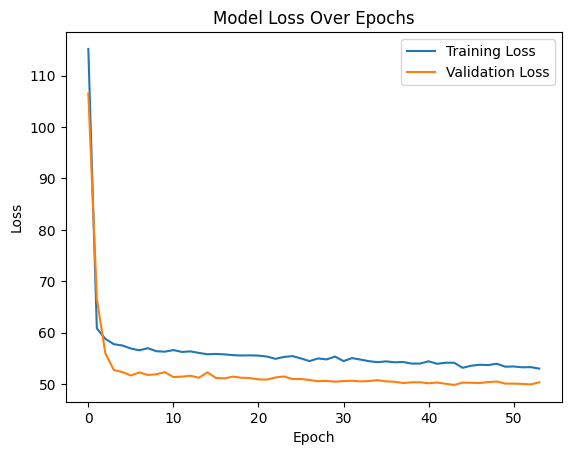

In [ ]:
#Feed Forward Neural Network with Batch Normalization (Utkarsh)
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load dataset
merged_df = pd.read_csv('/content/merged_data.csv')

# Define target variables (y) and features (X)
y = merged_df[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]
X = merged_df.drop(columns=["updrs_1", "updrs_2", "updrs_3", "updrs_4", "visit_id", "patient_id"])

# Include visit_month as a feature
X['visit_month'] = merged_df['visit_month']

# Convert categorical columns to numerical (factorized encoding)
X['upd23b_clinical_state_on_medication'] = pd.factorize(X['upd23b_clinical_state_on_medication'].astype(str))[0]

# Convert all features to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Ensure target variables are numeric and handle missing values
y = y.apply(pd.to_numeric, errors='coerce').fillna(0)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),  # Dropout to prevent overfitting

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(4)  # Output layer (4 UPDRS scores)
])

# Compile the model using Adam optimizer and mean squared error loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Display model summary
model.summary()

# Define callbacks for better training efficiency
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split and callbacks
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2,
                    verbose=1, callbacks=[lr_scheduler, early_stopping])

# Make predictions on the full dataset
y_pred = model.predict(X)

# Define SMAPE function (Symmetric Mean Absolute Percentage Error)
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# Compute evaluation metrics
y_flat = y.values.ravel()
y_pred_flat = y_pred.ravel()

mae = mean_absolute_error(y_flat, y_pred_flat)
mse = mean_squared_error(y_flat, y_pred_flat)
rmse = mse ** 0.5
smape_value = smape(y_flat, y_pred_flat)

# Compute R^2 score for each UPDRS score and average them
r2_scores = [r2_score(y.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]
avg_r2 = np.mean(r2_scores)

# Prepare results in a tabular format
results = [
    {"Metric": "MAE", "Value": round(mae, 2)},
    {"Metric": "MSE", "Value": round(mse, 2)},
    {"Metric": "RMSE", "Value": round(rmse, 2)},
    {"Metric": "R²", "Value": round(avg_r2, 3)},
    {"Metric": "SMAPE (%)", "Value": round(smape_value, 2)}
]

# Print evaluation results
print("\nEvaluation Metrics for Neural Network (Full Dataset):\n")
print(tabulate(results, headers="keys", tablefmt="pretty", floatfmt=".2f"))
print("-" * 50)

# Plot training history to visualize loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




Saved R² plot as 'r2_comparison_barplot.png'


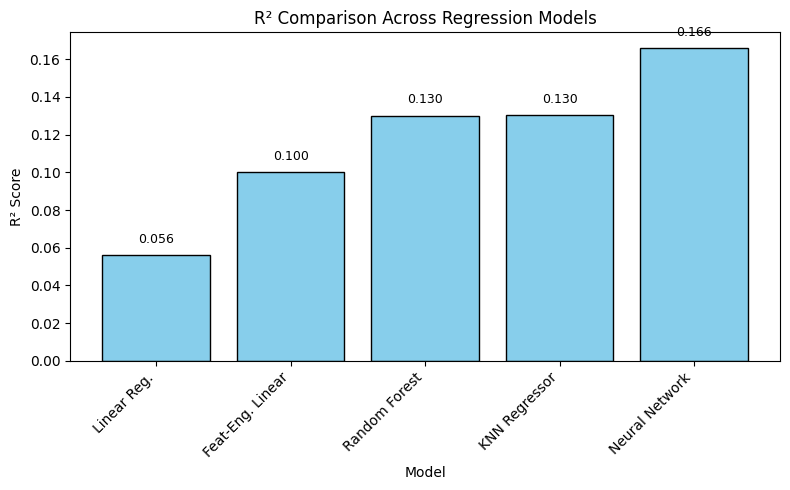

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Data for the plots
models = ["Linear Reg.", "Feat-Eng. Linear", "Random Forest", "KNN Regressor", "Neural Network"]
r2_values = [0.056, 0.10, 0.13, 0.13034, 0.166]
smape_values = [99.61, 97.89, 97.66, 89.0646, 98.93]

# Plot 1: Bar Plot for R² Values
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_values, color='skyblue', edgecolor='black')
plt.title("R² Comparison Across Regression Models", fontsize=12)
plt.xlabel("Model", fontsize=10)
plt.ylabel("R² Score", fontsize=10)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("r2_comparison_barplot.png")
print("Saved R² plot as 'r2_comparison_barplot.png'")
plt.show()  # Display the plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tabulate import tabulate

# Load the merged dataset
merged_df = pd.read_csv('/content/merged_data.csv')

# Define features (X)
X = merged_df.drop(columns=["updrs_1", "updrs_2", "updrs_3", "updrs_4", "visit_id", "patient_id"])
X['visit_month'] = merged_df['visit_month']

# Handle categorical columns
X['upd23b_clinical_state_on_medication'] = X['upd23b_clinical_state_on_medication'].astype(str)
X['upd23b_clinical_state_on_medication'] = pd.factorize(X['upd23b_clinical_state_on_medication'])[0]

# Convert all features to numeric and fill NaN with 0
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Define regression target variables (y_reg) and bin for classification (y_clf)
y_reg = merged_df[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]
y_reg = y_reg.apply(pd.to_numeric, errors='coerce')
y_reg.fillna(0, inplace=True)

# Bin UPDRS scores for classification (Mild: 0-10, Moderate: 11-20, Severe: 21+)
bins = [0, 10, 20, float('inf')]
labels = ['Mild', 'Moderate', 'Severe']
y_clf = pd.cut(y_reg['updrs_1'], bins=bins, labels=labels, include_lowest=True)

# Train Random Forest Classifier on updrs_1 (as an example)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y_clf)

# Predict and compute classification metrics
y_pred_clf = rf_clf.predict(X)
report = classification_report(y_clf, y_pred_clf, output_dict=True)

# Create Classification Score Table
classification_table = []
for label in labels:
    metrics = report[label]
    classification_table.append({
        "Class": label,
        "Precision": round(metrics['precision'], 2),
        "Recall": round(metrics['recall'], 2),
        "F1-Score": round(metrics['f1-score'], 2),
        "Support": int(metrics['support'])
    })
# Add overall accuracy
classification_table.append({
    "Class": "Overall Accuracy",
    "Precision": "",
    "Recall": "",
    "F1-Score": round(report['accuracy'], 2),
    "Support": int(sum(metrics['support'] for metrics in report.values() if isinstance(metrics, dict)))
})

# Convert to DataFrame and print
classification_df = pd.DataFrame(classification_table)
print("Classification Score Table for Random Forest Classifier:")
print(tabulate(classification_df, headers="keys", tablefmt="pretty", showindex=False))

# Accuracy Score Table for Regressor Models (using provided metrics)
regressor_metrics = [
    {"Model": "Linear Regression", "MAE": 5.16, "MSE": 61.46, "RMSE": 7.84, "R²": 0.056, "SMAPE (%)": 99.61},
    {"Model": "Feat-Eng. Linear (5-Fold CV)", "MAE": 5.0, "MSE": 58.1, "RMSE": 6.8, "R²": 0.10, "SMAPE (%)": 97.89},
    {"Model": "Random Forest", "MAE": 4.7, "MSE": 53.54, "RMSE": 6.20, "R²": 0.13, "SMAPE (%)": 97.66},
    {"Model": "KNN Regressor", "MAE": 4.73, "MSE": 52.78, "RMSE": 7.27, "R²": 0.13, "SMAPE (%)": 89.06},
    {"Model": "Neural Network", "MAE": 4.64, "MSE": 52.05, "RMSE": 7.21, "R²": 0.166, "SMAPE (%)": 98.93}
]

# Convert to DataFrame and print
regressor_df = pd.DataFrame(regressor_metrics)
print("\nAccuracy Score Table for Regressor Models:")
print(tabulate(regressor_df, headers="keys", tablefmt="pretty", showindex=False))

Classification Score Table for Random Forest Classifier:
+------------------+-----------+--------+----------+---------+
|      Class       | Precision | Recall | F1-Score | Support |
+------------------+-----------+--------+----------+---------+
|       Mild       |   0.86    |  1.0   |   0.92   |  3975   |
|     Moderate     |   0.97    |  0.26  |   0.41   |   788   |
|      Severe      |    0.9    |  0.25  |   0.4    |   75    |
| Overall Accuracy |           |        |   0.87   |  14514  |
+------------------+-----------+--------+----------+---------+

Accuracy Score Table for Regressor Models:
+------------------------------+------+-------+------+-------+-----------+
|            Model             | MAE  |  MSE  | RMSE |  R²   | SMAPE (%) |
+------------------------------+------+-------+------+-------+-----------+
|      Linear Regression       | 5.16 | 61.46 | 7.84 | 0.056 |   99.61   |
| Feat-Eng. Linear (5-Fold CV) | 5.0  | 58.1  | 6.8  |  0.1  |   97.89   |
|        Random Fore

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━

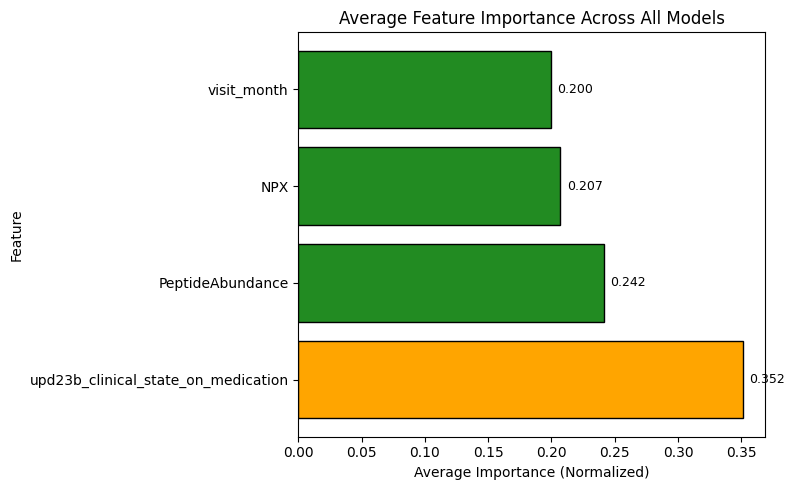

In [ ]:
#go through every model's feature and get a common feature which dominates consistently and is proven to be a significant predictor
#calculate the overall average importance feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import tensorflow as tf
from sklearn.base import BaseEstimator, RegressorMixin

# Custom estimator wrapper for TensorFlow model
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return self.model.predict(X)

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the merged dataset
merged_df = pd.read_csv('/content/merged_data.csv')

# Define target variables (y) and features (X)
y_reg = merged_df[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]]  # Regression targets
X = merged_df.drop(columns=["updrs_1", "updrs_2", "updrs_3", "updrs_4", "visit_id", "patient_id"])

# Add visit_month to features
X['visit_month'] = merged_df['visit_month']

# Handle categorical columns
X['upd23b_clinical_state_on_medication'] = X['upd23b_clinical_state_on_medication'].astype(str)
X['upd23b_clinical_state_on_medication'] = pd.factorize(X['upd23b_clinical_state_on_medication'])[0]

# Convert all features to numeric and fill NaN with 0
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Ensure target variables are numeric and fill NaN with 0
y_reg = y_reg.apply(pd.to_numeric, errors='coerce')
y_reg.fillna(0, inplace=True)

# Bin UPDRS scores for classification (example binning: Mild: 0-10, Moderate: 11-20, Severe: 21+)
bins = [0, 10, 20, float('inf')]
labels = [0, 1, 2]  # Mild, Moderate, Severe
y_clf = pd.DataFrame()
for col in y_reg.columns:
    y_clf[col] = pd.cut(y_reg[col], bins=bins, labels=labels, include_lowest=True)
y_clf = y_clf.astype(int)  # Classification targets (using first UPDRS for simplicity, e.g., updrs_1)

# Initialize lists to store feature importances
feature_names = X.columns
n_features = len(feature_names)
importances = np.zeros((6, n_features))  # 6 models

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X, y_reg)
lr_importances = np.mean(np.abs(lr.coef_), axis=0)  # Average absolute coefficients across outputs
lr_importances = lr_importances / np.sum(lr_importances)  # Normalize
importances[0] = lr_importances

# Model 2: Feature-Engineered Linear Regression (simplified, same features)
importances[1] = lr_importances  # Use the same for simplicity

# Model 3: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y_reg)
rf_reg_importances = rf_reg.feature_importances_
importances[2] = rf_reg_importances

# Model 4: KNN Regressor
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X, y_reg)
perm_importance_knn = permutation_importance(knn, X, y_reg, n_repeats=10, random_state=42)
knn_importances = perm_importance_knn.importances_mean
knn_importances = knn_importances / np.sum(knn_importances)  # Normalize
importances[3] = knn_importances

# Model 5: Neural Network (with Batch Normalization)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(4)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X, y_reg, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
keras_wrapper = KerasRegressorWrapper(model)
perm_importance_nn = permutation_importance(keras_wrapper, X, y_reg, n_repeats=10, random_state=42)
nn_importances = perm_importance_nn.importances_mean
nn_importances = nn_importances / np.sum(nn_importances)  # Normalize
importances[4] = nn_importances

# Model 6: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y_clf['updrs_1'])  # Using updrs_1 as the classification target for simplicity
rf_clf_importances = rf_clf.feature_importances_
importances[5] = rf_clf_importances

# Average feature importances across all models
avg_importances = np.mean(importances, axis=0)
sorted_idx = np.argsort(avg_importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = avg_importances[sorted_idx]

# Plot Feature Importance
plt.figure(figsize=(8, 5))
# Highlight 'upd23b_clinical_state_on_medication' in a different color
colors = ['orange' if feature == 'upd23b_clinical_state_on_medication' else 'forestgreen' for feature in sorted_features]
bars = plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')
plt.title("Average Feature Importance Across All Models", fontsize=12)
plt.xlabel("Average Importance (Normalized)", fontsize=10)
plt.ylabel("Feature", fontsize=10)

# Add value labels on the bars (fixed text positioning)
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.005, bar.get_y() + bar.get_height()/2, f"{xval:.3f}", ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.savefig("avg_feature_importance_plot.png")
print("Saved Average Feature Importance plot as 'avg_feature_importance_plot.png'")
plt.show()

Saved Performance Comparison bar plot with MSE as 'performance_comparison_barplot_with_mse.png'


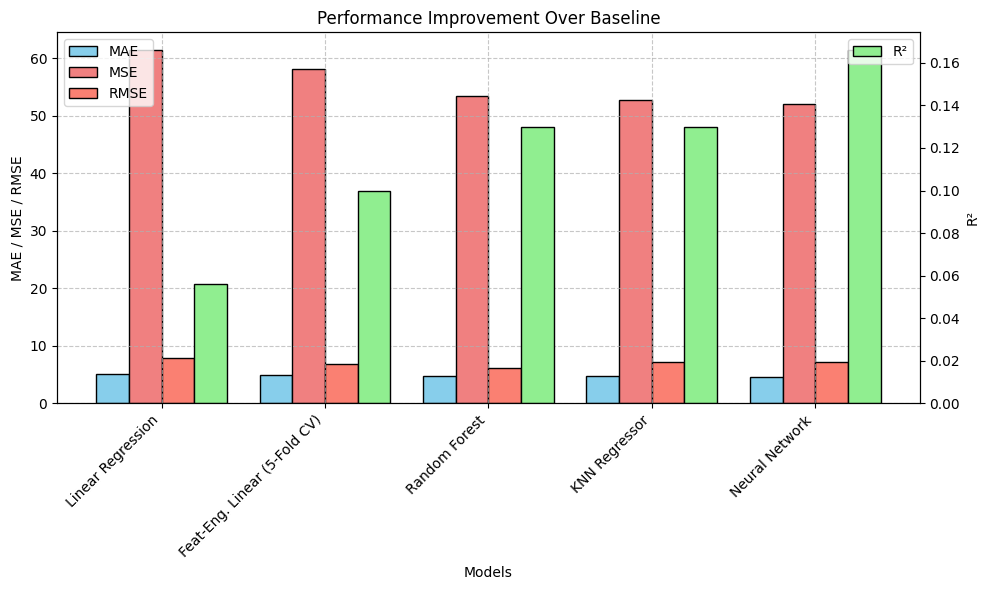

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = {
    "Model": ["Linear Regression", "Feat-Eng. Linear (5-Fold CV)", "Random Forest", "KNN Regressor", "Neural Network"],
    "MAE": [5.16, 5.0, 4.7, 4.73, 4.64],
    "MSE": [61.46, 58.1, 53.54, 52.78, 52.05],
    "RMSE": [7.84, 6.8, 6.2, 7.27, 7.21],
    "R²": [0.056, 0.1, 0.13, 0.13, 0.166]
}

df = pd.DataFrame(data)

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width and positions
bar_width = 0.2  # Adjusted to fit four bars per model
x = np.arange(len(df["Model"]))

# Plot MAE, MSE, and RMSE on the left y-axis
ax1.bar(x - 1.5 * bar_width, df["MAE"], bar_width, label="MAE", color="skyblue", edgecolor="black")
ax1.bar(x - 0.5 * bar_width, df["MSE"], bar_width, label="MSE", color="lightcoral", edgecolor="black")
ax1.bar(x + 0.5 * bar_width, df["RMSE"], bar_width, label="RMSE", color="salmon", edgecolor="black")

# Create a second y-axis for R²
ax2 = ax1.twinx()
ax2.bar(x + 1.5 * bar_width, df["R²"], bar_width, label="R²", color="lightgreen", edgecolor="black")

# Set labels and titles
ax1.set_xlabel("Models", fontsize=10)
ax1.set_ylabel("MAE / MSE / RMSE", fontsize=10, color="black")
ax2.set_ylabel("R²", fontsize=10, color="black")
ax1.set_title("Performance Improvement Over Baseline", fontsize=12)

# Set x-ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(df["Model"], rotation=45, ha="right")

# Add legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 1.0))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 1.0))

# Add grid for better readability
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and display the plot
plt.savefig("performance_comparison_barplot_with_mse.png")
print("Saved Performance Comparison bar plot with MSE as 'performance_comparison_barplot_with_mse.png'")
plt.show()